In [2]:
import os
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [3]:
## 144타석
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\전처리')
Saber = pd.read_csv('2019_타자_Saber.csv', encoding = 'cp949')
Saber.index = Saber['Name']
#Saber = Saber[Saber['PA'] >= math.trunc(144 * 3.1)]
Saber = Saber[Saber['PA'] >= 144]
Saber = Saber.iloc[:, -15:]
Saber = Saber.drop('나종덕') ## RC가 음수임 ;;
Saber = Saber.drop(columns = ['Money_20'])
Saber

,OBP,SLG,OPS,GPA,SECA,TA,RC,RC27,XR,ISO,PSR,wOBA,BABIP,OW%
Name,,,,,,,,,,,,,,
이정후,0.38596,0.45645,0.84241,0.28780,0.29094,0.80397,95.03027,3.51964,92.56000,0.12021,8.21053,0.53310,0.35150,0.96536
김하성,0.38942,0.49074,0.88016,0.29793,0.47593,0.96154,96.32271,3.56751,104.67000,0.18333,24.11538,0.62520,0.32813,0.96626
정은원,0.31715,0.37411,0.69127,0.23625,0.28191,0.63636,58.53332,2.16790,69.29200,0.11170,10.18182,0.53814,0.30369,0.91360
이천웅,0.37767,0.37363,0.75129,0.26336,0.24359,0.71571,71.92514,2.66389,75.39400,0.06593,3.65217,0.53459,0.35853,0.94106
최정,0.39934,0.51889,0.91823,0.30942,0.47714,0.99171,95.73611,3.54578,107.06400,0.22664,5.43750,0.67752,0.30256,0.96586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,0.28144,0.36424,0.64568,0.21771,0.29139,0.57025,11.04339,0.40901,16.51000,0.14570,0.00000,1.64929,0.25234,0.27347
허일,0.31481,0.30201,0.61683,0.21717,0.16779,0.53097,12.49533,0.46279,14.69600,0.04698,1.33333,1.62984,0.30833,0.32518
김찬형,0.32237,0.35461,0.67698,0.23372,0.16312,0.58879,14.18193,0.52526,15.79200,0.07801,1.50000,1.72412,0.31667,0.38300


In [4]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
df_df = pd.read_csv('2019_전포지션_수비점수_March_kWAR_AHP.csv', encoding = 'cp949')
df_df.index = df_df['선수명']
del df_df['선수명']
df_df

,IP,E,March_score,kWAR_score,AHP_score
선수명,,,,,
강경학,273.00,4.0,1468.641,147.829,39.993
강로한,709.67,20.0,3910.467,449.717,105.735
강민국,245.67,9.0,1487.254,171.306,44.404
강민호,842.00,8.0,6661.904,832.738,308.113
강백호,622.66,3.0,1549.272,127.421,23.109
...,...,...,...,...,...
홍창기,52.00,0.0,136.500,13.400,2.337
황대인,48.00,0.0,100.000,1.200,1.260
황윤호,297.67,6.0,1534.647,177.799,38.623


In [35]:
# df_fin = Saber
Saber['kWAR_score'] = df_df['kWAR_score']
#Saber['March_score'] = df_df['March_score']
Saber['AHP_score'] = df_df['AHP_score']
Saber

,OBP,SLG,OPS,GPA,SECA,TA,RC,RC27,XR,ISO,PSR,wOBA,BABIP,OW%,kWAR_score,March_score,AHP_score
Name,,,,,,,,,,,,,,,,,
이정후,0.38596,0.45645,0.84241,0.28780,0.29094,0.80397,95.03027,3.51964,92.560,0.12021,8.21053,0.53310,0.35150,0.96536,290.201,2884.098,50.647
김하성,0.38942,0.49074,0.88016,0.29793,0.47593,0.96154,96.32271,3.56751,104.670,0.18333,24.11538,0.62520,0.32813,0.96626,785.830,6602.337,206.309
정은원,0.31715,0.37411,0.69127,0.23625,0.28191,0.63636,58.53332,2.16790,69.292,0.11170,10.18182,0.53814,0.30369,0.91360,702.721,7027.212,145.229
이천웅,0.37767,0.37363,0.75129,0.26336,0.24359,0.71571,71.92514,2.66389,75.394,0.06593,3.65217,0.53459,0.35853,0.94106,420.339,3690.130,70.483
최정,0.39934,0.51889,0.91823,0.30942,0.47714,0.99171,95.73611,3.54578,107.064,0.22664,5.43750,0.67752,0.30256,0.96586,661.361,4409.072,136.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,0.28144,0.36424,0.64568,0.21771,0.29139,0.57025,11.04339,0.40901,16.510,0.14570,0.00000,1.64929,0.25234,0.27347,56.394,552.936,10.041
허일,0.31481,0.30201,0.61683,0.21717,0.16779,0.53097,12.49533,0.46279,14.696,0.04698,1.33333,1.62984,0.30833,0.32518,46.765,465.352,8.300
김찬형,0.32237,0.35461,0.67698,0.23372,0.16312,0.58879,14.18193,0.52526,15.792,0.07801,1.50000,1.72412,0.31667,0.38300,286.502,2494.480,77.129


In [36]:
Scaled_Saber = StandardScaler().fit_transform(Saber)
pd.DataFrame(Scaled_Saber)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.287552,1.157483,1.285292,1.312646,0.027025,0.999527,2.246215,2.246215,1.815807,0.175190,1.022387,-1.061568,1.313936,0.949822,-0.206410,-0.136366,-0.419770
1,1.377762,1.668187,1.667036,1.631851,2.114815,2.191685,2.301531,2.301533,2.321025,1.431254,4.868988,-0.776247,0.588578,0.953498,1.529127,1.549661,1.230588
2,-0.506480,-0.068863,-0.243098,-0.311738,-0.074887,-0.268593,0.684159,0.684158,0.845087,0.005845,1.499145,-1.045954,-0.169991,0.738396,1.238106,1.742319,0.583006
3,1.071413,-0.076012,0.363849,0.542521,-0.507365,0.331761,1.257324,1.257319,1.099657,-0.904960,-0.080057,-1.056952,1.532134,0.850563,0.249293,0.229127,-0.209465
4,1.636399,2.087444,2.052015,1.993911,2.128471,2.419948,2.276424,2.276423,2.420901,2.293106,0.351727,-0.614162,-0.205064,0.951864,1.093276,0.555130,0.492379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-1.437520,-0.215863,-0.704122,-0.895950,0.032104,-0.768774,-1.348393,-1.348398,-1.356931,0.682432,-0.963337,2.396335,-1.763792,-1.876363,-1.025128,-1.193427,-0.850282
101,-0.567489,-1.142697,-0.995865,-0.912966,-1.362841,-1.065963,-1.286250,-1.286251,-1.432610,-1.282058,-0.640870,2.336080,-0.025974,-1.665141,-1.058846,-1.233141,-0.868740
102,-0.370382,-0.359289,-0.387604,-0.391461,-1.415547,-0.628503,-1.214065,-1.214061,-1.386885,-0.664573,-0.600561,2.628154,0.232883,-1.428962,-0.219362,-0.313038,-0.139002
103,-0.936672,-0.214374,-0.508852,-0.622751,1.380325,-0.249451,-1.381383,-1.381379,-1.377624,1.330960,-0.963337,3.025653,-3.247099,-1.989878,-1.167976,-1.369789,-0.926967


In [38]:
pca = PCA(n_components = 2)
PC = pca.fit_transform(Scaled_Saber)
principals = pd.DataFrame(data = PC, columns = ['PC1', 'PC2'])
print('주성분 설명력', pca.explained_variance_ratio_)
print('주성분 설명력 합', sum(pca.explained_variance_ratio_))
print('고유값', pca.explained_variance_)
prins = pd.DataFrame(pca.components_)
prins.columns = Saber.columns
prins.index = ['P1', 'P2']
prins

주성분 설명력 [0.5759388  0.19366658]
주성분 설명력 합 0.7696053796942816
고유값 [9.88510341 3.32398892]


,OBP,SLG,OPS,GPA,SECA,TA,RC,RC27,XR,ISO,PSR,wOBA,BABIP,OW%,kWAR_score,March_score,AHP_score
P1,0.280659,0.288742,0.304906,0.305366,0.233953,0.304552,0.303406,0.303406,0.305063,0.211894,0.160026,-0.21078,0.166492,0.276705,0.049994,0.059293,0.041794
P2,-0.035758,-0.145098,-0.112386,-0.096193,-0.175942,-0.108041,0.047946,0.047946,0.049491,-0.203598,0.069759,-0.26364,0.024732,0.148434,0.515564,0.516668,0.484651


In [8]:
# pca = PCA(n_components = 3)
# PC = pca.fit_transform(Saber)
# principals = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3'])
# print('주성분 설명력', pca.explained_variance_ratio_)
# print('주성분 설명력 합', sum(pca.explained_variance_ratio_))
# print('고유값', pca.explained_variance_)
# prins = pd.DataFrame(pca.components_)
# prins.columns = Saber.columns
# prins.index = ['P1', 'P2', 'P3']
# prins

In [39]:
Saber['SECA'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['SECA']] ## 왜 유독 이새끼만 지랄인지 모르겠음
Saber['RC'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['RC']]
Saber['RC27'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['RC27']]
Saber['XR'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['XR']]

AttributeError: 'float' object has no attribute 'replace'

In [41]:
GEN_list = []
POW_list = []
#SPD_list = []

for a in range(0, len(Saber)) :
    GEN = 0
    POW = 0
   # SPD = 0
    
    for b in range(0, len(Saber.columns)) :
        GEN += Saber.iloc[a, b] * prins.iloc[0, b]
        POW += Saber.iloc[a, b] * prins.iloc[1, b]
       # SPD += Saber.iloc[a, b] * prins.iloc[2, b]
    
    GEN_list.append(GEN)
    POW_list.append(POW)
   # SPD_list.append(SPD)

In [42]:
df_fin = pd.DataFrame(index = Saber.index)
df_fin['P1'] = GEN_list
df_fin['P2'] = POW_list
#df_fin['P3'] = SPD_list
df_fin

,P1,P2
Name,,
이정후,248.220476,1673.811128
김하성,506.724660,3927.554066
정은원,500.006448,4070.166311
이천웅,289.995103,2164.704145
최정,365.132115,2695.195859
...,...,...
이우성,45.026020,320.304954
허일,39.343912,269.391752
김찬형,175.472709,1474.841805


In [43]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\전처리')
df_1 = pd.read_csv('2019_타자_DEA_OPS_144타석_연차_FA.csv', encoding = 'cp949')
df_1.index = df_1['Name']
del df_1['Name']
df_1 = df_1.drop('나종덕')
df_1

,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,...,P_HIT_CN,Position,Money_19,Money_20,OBP,SLG,OPS,연차,프로입단,FA유무
Name,,,,,,,,,,,,,,,,,,,,,
이정후,630,574,68,91,193,31,10,6,13,7,...,42,외,23000,39000,0.385965,0.456446,0.842411,3,2017,0
김하성,625,540,104,112,166,38,2,19,33,4,...,59,내,32000,55000,0.389423,0.490741,0.880164,6,2014,0
정은원,624,564,57,83,148,27,6,8,14,7,...,27,내,5500,12000,0.317152,0.374113,0.691266,2,2018,0
이천웅,613,546,48,88,168,24,3,2,21,10,...,35,외,15000,28000,0.377668,0.373626,0.751295,9,2011,0
최정,606,503,99,86,147,27,0,29,3,2,...,47,내,120000,120000,0.399340,0.518887,0.918227,15,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,168,151,22,19,33,4,0,6,0,0,...,11,외,4000,4000,0.281437,0.364238,0.645676,7,2013,0
허일,162,149,17,14,38,4,0,1,2,1,...,14,외,3000,4100,0.314815,0.302013,0.616828,9,2011,0
김찬형,154,141,12,16,39,4,2,1,3,4,...,5,내,4300,5800,0.322368,0.354610,0.676978,4,2016,0


In [44]:
df_fin['연차'] = df_1['연차']
df_fin['20연봉'] = df_1['Money_20']
df_fin['FA유무'] = df_1['FA유무']
df_fin

,P1,P2,연차,20연봉,FA유무
Name,,,,,
이정후,248.220476,1673.811128,3,39000,0
김하성,506.724660,3927.554066,6,55000,0
정은원,500.006448,4070.166311,2,12000,0
이천웅,289.995103,2164.704145,9,28000,0
최정,365.132115,2695.195859,15,120000,1
...,...,...,...,...,...
이우성,45.026020,320.304954,7,4000,0
허일,39.343912,269.391752,9,4100,0
김찬형,175.472709,1474.841805,4,5800,0


In [45]:
# pos_score = []
# for po in range(0, len(df_1)) :
#     if df_1['Position'][po] == '내' :
#         pos_score.append(1)
#     elif df_1['Position'][po] == '외' :
#         pos_score.append(0)
#     elif df_1['Position'][po] == '포' :
#         pos_score.append(2)
# df_1['pos_score'] = pos_score
# df_1

In [46]:
# df_fin['pos_weight'] = pos_score
# df_fin

In [47]:
df_fin['20연봉'] = np.log(df_fin['20연봉'])
df_fin

,P1,P2,연차,20연봉,FA유무
Name,,,,,
이정후,248.220476,1673.811128,3,10.571317,0
김하성,506.724660,3927.554066,6,10.915088,0
정은원,500.006448,4070.166311,2,9.392662,0
이천웅,289.995103,2164.704145,9,10.239960,0
최정,365.132115,2695.195859,15,11.695247,1
...,...,...,...,...,...
이우성,45.026020,320.304954,7,8.294050,0
허일,39.343912,269.391752,9,8.318742,0
김찬형,175.472709,1474.841805,4,8.665613,0


In [48]:
## 표준화 하나마나 결과 똑같음
# scaled_df_fin = StandardScaler().fit_transform(df_fin)
# scaled_df_fin = pd.DataFrame(scaled_df_fin, columns = df_fin.columns, index = df_fin.index)
# scaled_df_fin['연차'] = df_fin['연차']
# scaled_df_fin['20연봉'] = df_fin['20연봉']
# scaled_df_fin['FA유무'] = df_fin['FA유무']
# scaled_df_fin

In [49]:
x = df_fin.drop(['20연봉'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.37375798 11.00376621  9.81032195 10.39152077 12.14969535 10.90884366
 11.57309182  9.92003224 10.62974359 11.27362709 11.9174715  11.90310867
 11.54882143 10.45088298 10.46413771 11.03004122  9.58609183 10.24603478
 10.70826168 11.22662907 10.99879618 10.55878373 10.12793012  9.49907396
 10.39805109 10.11402019 10.09253283 11.35996296 10.11136759  9.94707921
 11.05084891  9.92032965 11.41140567 11.16812474 10.36971896 10.9237287
 10.33380093 10.68165453 10.03959912 11.27118808  9.65451322  9.94954363
  9.8455628  10.60236666 11.80207327 10.96065631  9.80858675 10.25922975
 10.25084098  9.42650367 11.19259283  9.22368264  9.57344477  9.58890432
 11.08388688 10.85604933  9.09000813  9.45980117  9.8150006   9.37481438
  9.52824656 10.18357148 10.41875083  9.31682929 10.8154678   9.59537579
  9.63487582  9.19158223 10.70710137 10.41853169  9.90451509  8.91012087
  9.27860331  9.51027419  9.83563839  9.18205744  8.89407655 10.35319455
  8.90828083  9.04758988  9.14738646  9.09330669  8.

In [50]:
df_fin['salary'] = df_fin['20연봉']
df_fin

,P1,P2,연차,20연봉,FA유무,salary
Name,,,,,,
이정후,248.220476,1673.811128,3,10.571317,0,10.571317
김하성,506.724660,3927.554066,6,10.915088,0,10.915088
정은원,500.006448,4070.166311,2,9.392662,0,9.392662
이천웅,289.995103,2164.704145,9,10.239960,0,10.239960
최정,365.132115,2695.195859,15,11.695247,1,11.695247
...,...,...,...,...,...,...
이우성,45.026020,320.304954,7,8.294050,0,8.294050
허일,39.343912,269.391752,9,8.318742,0,8.318742
김찬형,175.472709,1474.841805,4,8.665613,0,8.665613


In [54]:
scaled_df_fin['salary'] = scaled_df_fin['20연봉']
scaled_df_fin

,P1,P2,P3,연차,20연봉,FA유무,salary
Name,,,,,,,
이정후,0.054521,-0.150593,-0.183475,3,10.571317,0,10.571317
김하성,1.750882,1.547913,1.517743,6,10.915088,0,10.915088
정은원,1.706796,1.655391,1.623410,2,9.392662,0,9.392662
이천웅,0.328655,0.219363,0.197414,9,10.239960,0,10.239960
최정,0.821721,0.619161,0.599707,15,11.695247,1,11.695247
...,...,...,...,...,...,...,...
이우성,-1.278885,-1.170646,-1.148896,7,8.294050,0,8.294050
허일,-1.316172,-1.209016,-1.187553,9,8.318742,0,8.318742
김찬형,-0.422866,-0.300544,-0.280694,4,8.665613,0,8.665613


In [56]:
from statsmodels.formula.api import ols
res = ols(formula = 'salary ~ P1 + P2 + 연차 + FA유무', data = scaled_df_fin).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           3.90e-35
Time:                        01:13:27   Log-Likelihood:                -63.518
No. Observations:                 105   AIC:                             137.0
Df Residuals:                     100   BIC:                             150.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9585      0.120     74.546      0.000       8.720       9.197
P1             5.8674      0.468     12.534      0.000       4.939       6.796
P2            -5.6344      0.469    -12.014      0.000      -6.565      -4.704
연차             0.0823      0.012      6.871      0.000       0.059       0.106
FA유무           0.6240      0.128      4.883      0.000       0.370       0.878
==============================================================================
Omnibus:                        4.588   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.935
Skew:                           0.432   Prob(JB):                        0.140
Kurtosis:                       3.390   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
df_fin

,P1,P2,P3,연차,20연봉,FA유무,salary
Name,,,,,,,
이정후,248.220476,1673.811128,590.004880,3,10.571317,0,10.571317
김하성,506.724660,3927.554066,1426.937001,6,10.915088,0,10.915088
정은원,500.006448,4070.166311,1478.920877,2,9.392662,0,9.392662
이천웅,289.995103,2164.704145,777.386992,9,10.239960,0,10.239960
최정,365.132115,2695.195859,975.299338,15,11.695247,1,11.695247
...,...,...,...,...,...,...,...
이우성,45.026020,320.304954,115.055798,7,8.294050,0,8.294050
허일,39.343912,269.391752,96.038043,9,8.318742,0,8.318742
김찬형,175.472709,1474.841805,542.177130,4,8.665613,0,8.665613


In [283]:
df_fin = df_fin.iloc[:-6, :]
df_fin

,P1,P2,P3,연차,20연봉,FA유무,salary
Name,,,,,,,
이정후,248.220476,1673.811128,590.004880,3,10.571317,0,10.571317
김하성,506.724660,3927.554066,1426.937001,6,10.915088,0,10.915088
정은원,500.006448,4070.166311,1478.920877,2,9.392662,0,9.392662
이천웅,289.995103,2164.704145,777.386992,9,10.239960,0,10.239960
최정,365.132115,2695.195859,975.299338,15,11.695247,1,11.695247
...,...,...,...,...,...,...,...
박계범,173.428790,1414.122537,517.590372,6,8.612503,0,8.612503
유민상,51.685839,296.615388,100.793498,8,8.699515,0,8.699515
노시환,98.010708,836.636106,307.410158,1,8.101678,0,8.101678


In [284]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
df_fin.to_csv('2019_타자_144타석_수비포함주성분(3개_kWAR, AHP, March), 연차, 로그20연봉, FA유무_99개.csv', encoding = 'cp949')

In [103]:
old_fin = df_fin[df_fin['연차'] >= 12]
old_fin

,P1,P2,P3,연차,20연봉,FA유무
Name,,,,,,
최정,365.132115,2695.195859,975.299338,15,11.695247,1
전준우,206.857692,1347.177918,472.566368,12,10.819778,0
김현수,185.830944,1185.805582,413.024319,14,11.775290,1
김재환,180.394114,1172.949348,411.473748,12,11.082143,0
손아섭,213.866677,1491.159405,526.879714,13,12.206073,1
유한준,110.259209,535.752487,175.934662,20,10.819778,1
최형우,100.513294,412.001914,129.854801,18,11.918391,1
이대호,61.350316,159.710449,40.633263,19,12.429216,1
이명기,204.869358,1472.639271,524.299464,14,10.085809,0


In [104]:
len(old_fin)

47

In [105]:
yng_fin = df_fin[df_fin['연차'] < 12]
yng_fin

,P1,P2,P3,연차,20연봉,FA유무
Name,,,,,,
이정후,248.220476,1673.811128,590.004880,3,10.571317,0
김하성,506.724660,3927.554066,1426.937001,6,10.915088,0
정은원,500.006448,4070.166311,1478.920877,2,9.392662,0
이천웅,289.995103,2164.704145,777.386992,9,10.239960,0
박해민,301.203340,2357.987443,852.995297,8,10.308953,0
오지환,541.829973,4472.978644,1638.618752,11,11.002100,0
김상수,421.544452,3392.861566,1230.899226,11,10.126631,1
박찬호,410.146878,3385.703595,1241.628010,6,9.259131,0
허경민,326.691155,2570.466999,938.564723,11,10.778956,0


In [106]:
len(yng_fin)

58

In [111]:
x = old_fin.drop(['20연봉'], axis = 1)
y = old_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[12.22048324 11.02266112 11.59998301 10.76338156 11.27319051 11.84122061
 11.93325927 11.5504851  10.46829269 11.18580465 10.91054968 11.45389102
 11.18737963 11.39111677 10.86920318 10.44766807 10.89144063 10.46888121
 10.67814483  9.91706093 11.12161027 10.43165633 11.973586   11.06117025
  9.79422523 10.46970227 10.24933177 11.29113912 11.10741508 10.95742233
 10.02836683 10.56094392 10.90105381 10.83407244 10.27222567  9.73408451
  9.83433539 10.37989914  9.48126879  9.43100167 10.60080593  9.297532
 10.03883592  9.99249693  9.3779136  10.0907434   9.88258632]
r2score =  0.6413632631664303
mse =  0.2904935794459383
rmse =  0.5389745628932207
adjustedr2 =  0.5976270757477022


In [109]:
x = yng_fin.drop(['20연봉'], axis = 1)
y = yng_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.38714976 11.06623817  9.75466998 10.37346545  9.88742987 10.45552843
 10.1266311   9.60293929 10.28031738 10.68457999 10.51862479 10.10825353
  9.48180707 10.36733262 10.07894389 10.09838626 10.24389738  9.9695968
  9.89804284  9.63128323 10.06296322  9.82535731  9.39697238  9.24115436
  9.57048247  9.49688833  9.05158683  9.43286542  9.35489741  9.51009254
 10.12743564  9.30303166  9.53211813  9.64435895  9.16776548  9.97112347
  8.88599918  9.24502823  9.15009363  8.87335617  8.96938887  9.00894173
  9.12117354  9.0425744   8.41520841  8.88394095  8.86651731  8.5721751
  8.41531067  8.79664122  8.18488098  8.83175803  9.03821318  7.95823778
  8.60395058  8.75952546  8.48768892  8.65974267]
r2score =  0.8335273146890496
mse =  0.09272874964478142
rmse =  0.30451395640394124
adjustedr2 =  0.8175203257168429


In [115]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
old_fin.to_csv('2019_타자_144타석_12년차이상_수비포함주성분(3개), 연차, 로그20연봉, FA유무.csv', encoding = 'cp949')
yng_fin.to_csv('2019_타자_144타석_12년차이하_수비포함주성분(3개), 연차, 로그20연봉, FA유무.csv', encoding = 'cp949')

In [114]:
os.getcwd()

'C:\\Users\\jaij2\\OneDrive\\바탕 화면\\논문\\야구데이터\\전처리'

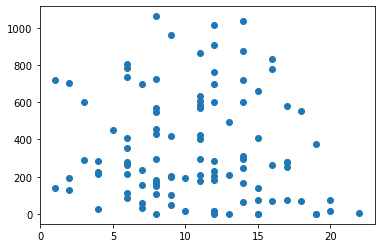

In [95]:
x = df_fin['연차']
y = Saber['kWAR_score']
z = df_fin['20연봉']

plt.plot(x, y, linestyle = 'none', marker = 'o')
plt.show()


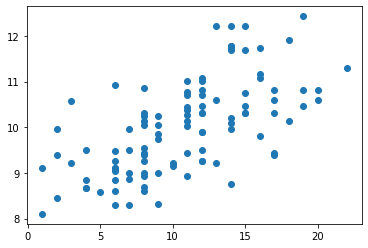

In [96]:
plt.plot(x, z, linestyle = 'none', marker = 'o')
plt.show()